In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [3]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


In [4]:
df_ROS_forpatient = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부','연령','직업','혈액형','재발여부']]

In [5]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


#### DDA 
- 1. 목표변수 설정 = 재발여부
- 2. 전처리(null값 확인) - .isnull().sum() 
        - 주의 사항: 대상 컬럼에 의한 레코드 삭제시 dataset의 양 고려

In [6]:
df_ROS_forpatient.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [7]:
# 이럴때 머신러닝은 채우고 통계는 삭제 
df_ROS_forpatient = df_ROS_forpatient.dropna()

In [8]:
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인
- 목표변수 : '재발여부'_분포: 불균형 (연속형: 정규화 확인, 범주형: 균형 확인) 
- 설명변수 
        -'성별': 성별에 따른 목표변수 차이 있어보임 ( 재발: 남 > 여)
        -'신장': 목표변수에 따른 변화 적음.
        -'심혈관질환': 심혈관이 있으면 상대적으로 재발이 높다
        -'체중': 몸무게차이에 따른 목표변수 차이 보임.
        -'흡연여부': 흡연자는 상대적으로 재발이 높다
        -'연령': 상대적으로 나이에 따라 목표변수 차이 보임. (나이 ↑ - 재발 ↑)
        -'직업': 운동선수, 교사 등의 재발이 높아보임
        -'혈액형': 차이 확인 필요_혈액형에 따른 재발 여부는 애매하지만 차이 있어보임. 
    ⇒ 변화시킬수없는 것은 주의.스토리 만들기.

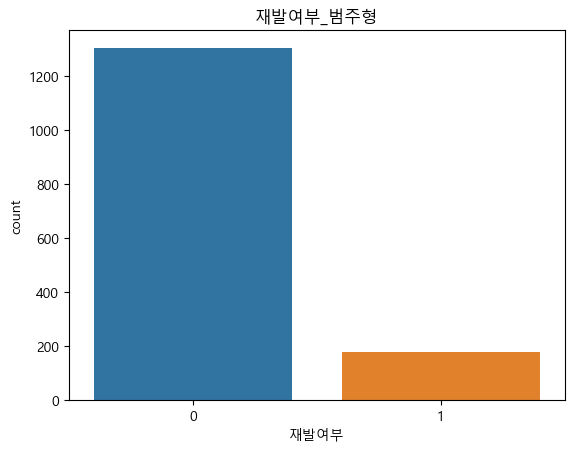

In [9]:
## 데이터 타입과 분포 확인 (DDA에서 하는것_재확인)
## 목표변수: 재발여부 _ 범주형 (countplot or barplot)
### (0=재발없음, 1=재발있음)
sns.countplot(data=df_ROS_forpatient, x = '재발여부')
plt.title('재발여부_범주형')
plt.show()

In [10]:
# column 성격 확인
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [13]:
# object로 변환할 범주형 확인: 성별, 심혈관질환, 흡연여부, 재발여부
df_ROS_forpatient[['성별','심혈관질환','흡연여부','재발여부']] = df_ROS_forpatient[['성별','심혈관질환','흡연여부','재발여부']].astype(object)
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [17]:
# 연속형
forpatient_list=df_ROS_forpatient.describe().columns.to_list()
forpatient_list

['신장', '체중', '연령']

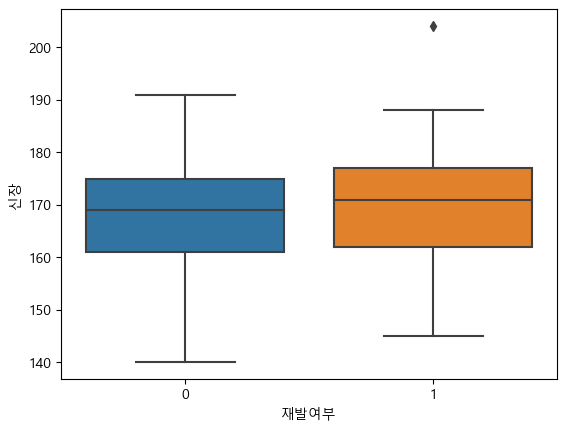

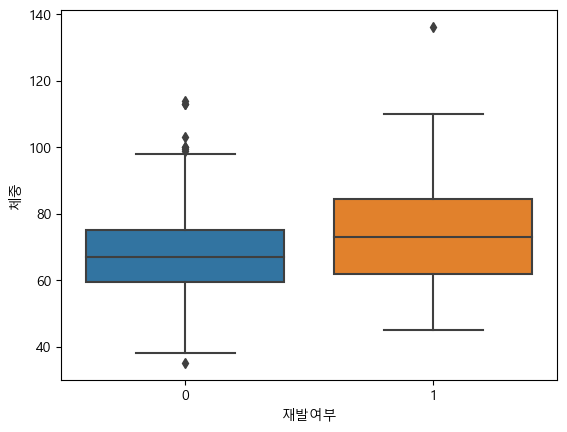

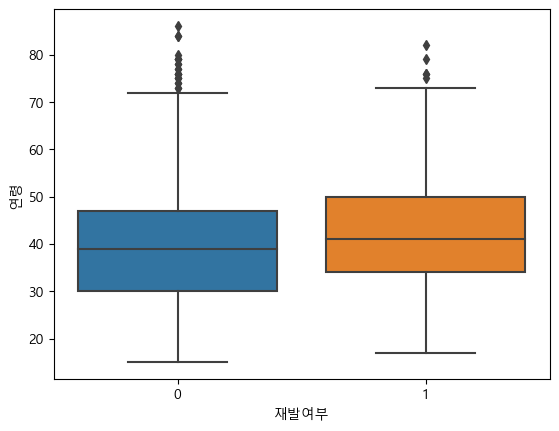

In [19]:
## x: 범주형/y: 연속형
for item in forpatient_list:
    sns.boxplot(data=df_ROS_forpatient, x='재발여부', y=item)
    plt.show()
    

In [21]:
# x: 범주형, y: 범주형
df_ROS_forpatient.describe(include=object)

,성별,심혈관질환,흡연여부,직업,혈액형,재발여부
count,1479,1479,1479,1479,1479,1479
unique,2,2,2,17,4,2
top,1,0,0,사무직,RH+A,0
freq,923,1423,1164,449,543,1302


In [22]:
## 이때 재발 여부는 필요 없음. 
df_ROS_forpatient.describe(include=object).drop(columns=['재발여부'])

,성별,심혈관질환,흡연여부,직업,혈액형
count,1479,1479,1479,1479,1479
unique,2,2,2,17,4
top,1,0,0,사무직,RH+A
freq,923,1423,1164,449,543


In [26]:
## 이거에 대한 columns만 가져오기
forpatient_object_list = df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_object_list

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

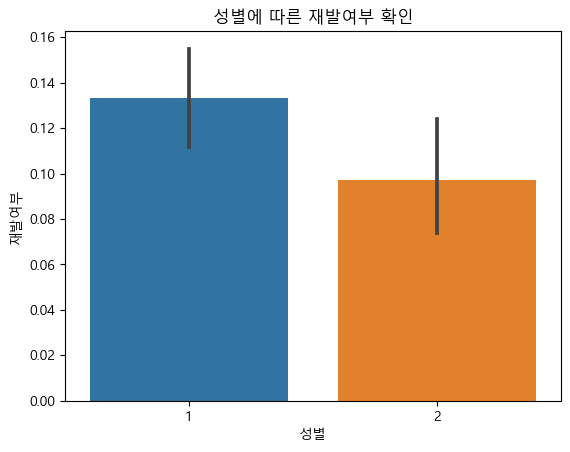

In [31]:
sns.barplot(data=df_ROS_forpatient, x='성별', y='재발여부')
plt.title('성별에 따른 재발여부 확인')
plt.show()

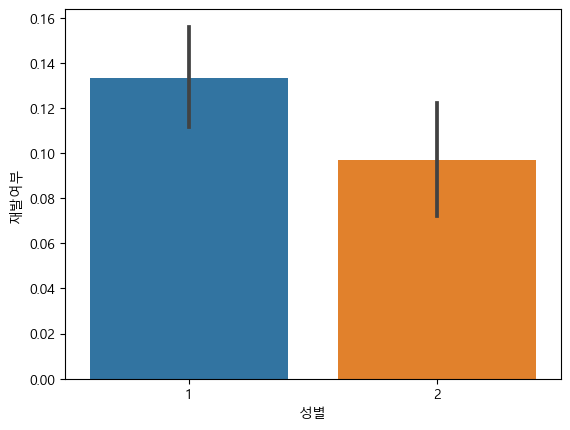

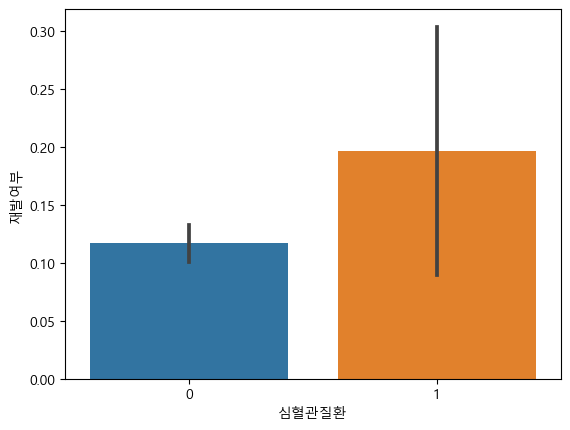

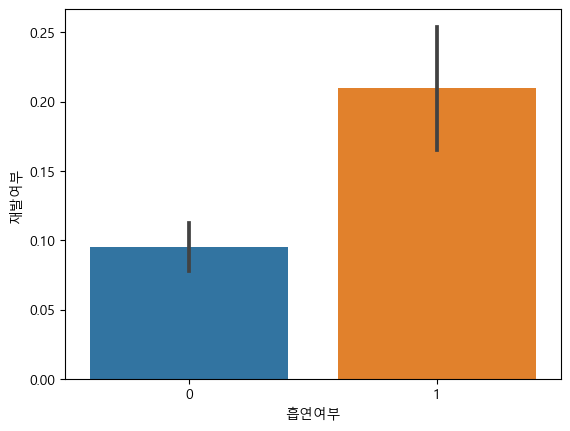

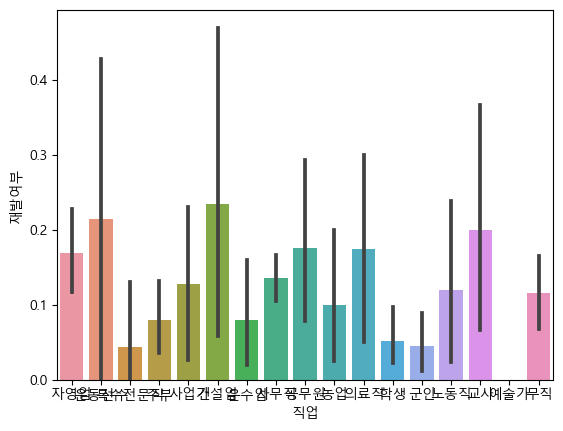

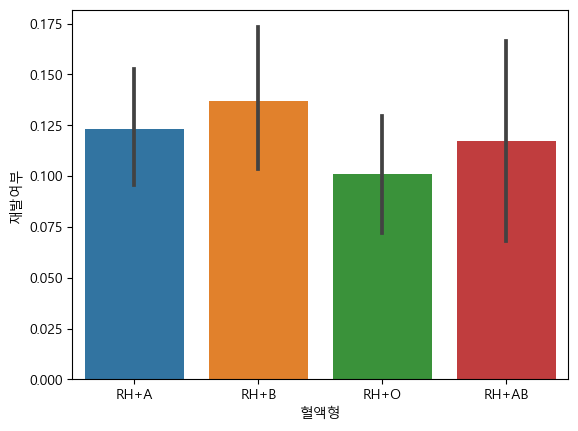

In [37]:
# looping
for item in forpatient_object_list :
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')
    plt.show()

In [ ]:
## 직업은 상위 5개 or 하위 5개로 뽑아서 각각을 보면 됨. 

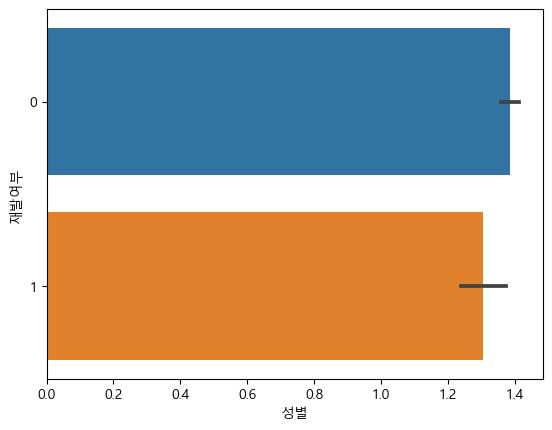

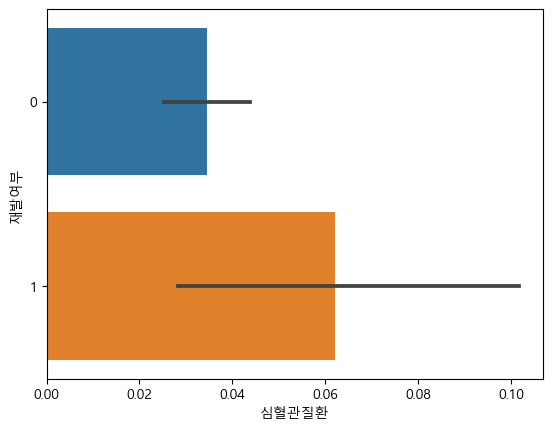

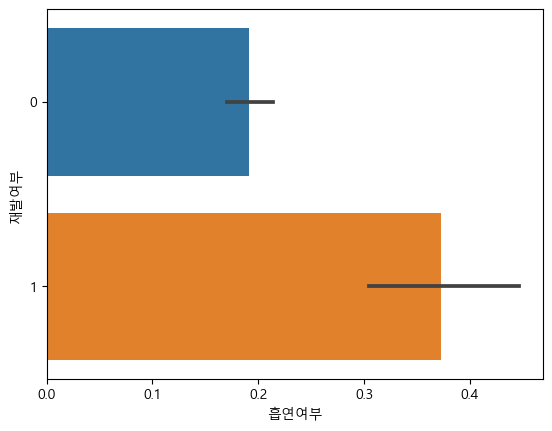

TypeError: Horizontal orientation requires numeric `x` variable.

In [42]:
# looping
for item in forpatient_object_list :
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부', orient='h')
    plt.show()